# ZADANIE 1

a) Wykonaj poniższy skrypt i przeanalizuj go:

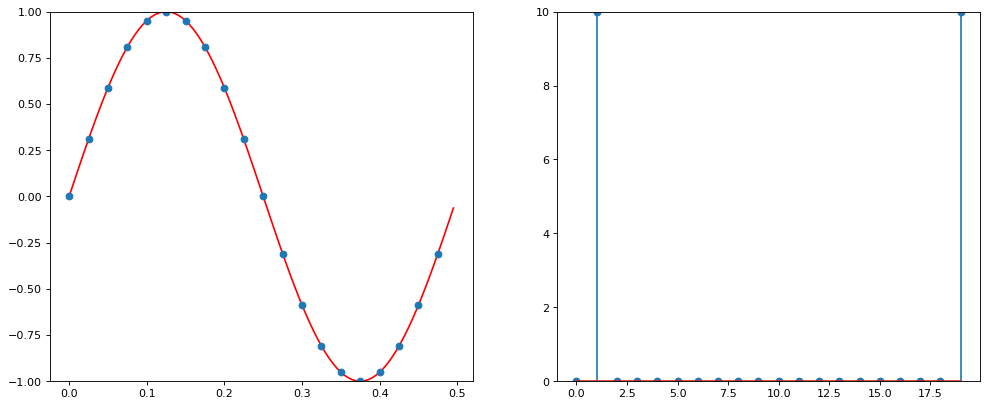

In [47]:
from __future__ import division
from pylab import *
from numpy import *
from numpy import *
from scipy import *
from ipywidgets import *
import math as mt
from matplotlib.ticker import AutoMinorLocator

%matplotlib inline

# (kod został opakowany w funkcję, aby środowisko nie podpowiadało zmiennych)
def foo():
    A = 1
    # amplituda sygnału

    LP = 1
    # liczba analizowanych pełnych przebiegów sygnału (okresów)

    w = 40           
    # częstotliwość próbkowania [Hz] sygnału 
    # (jak często w ciągu sekundy pobieramy informacje o wartości sygnału)

    f = 2.0           
    # częstotliwość sygnalu [Hz]

    T = 1.0/f        
    # okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)
        
    FUNC = lambda t : A*sin(2*pi*t*f)    
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)                 
    # funkcja spróbkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(121)

    ## --- POMOCNICZY SYGNAŁ
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 

    ax.plot(t, signal, 'o')

    signal1 = fft.fft(signal)
    # sygnal w dziedzinie czestotliwosci 

    signal1 = abs(signal1)        
    # modul sygnalu

    freqs = range(int(n))

    ax = fig.add_subplot(122)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    stem(freqs, signal1, '-*')

    show()

foo()

UWAGA: do dalszych ćwiczeń warto powyższy skrypt przekształcić na funkcję o wielu argumentach, typu: amplituda, częstotliwość próbkowania, liczba przebiegów. Oczywiście dla wygody, należy nadać wartości domyślne argumentom funkcji.

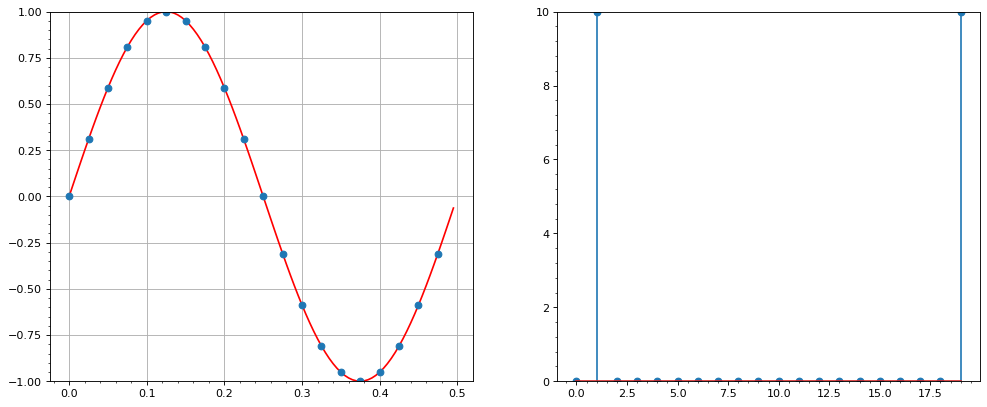

In [48]:
# zdefiniowana funkcja

# parametry to odpowiednio: a, LP, w, f 
def draw_signal(amplitude=1, interval_num=1, sampling_freq=40, signal_freq=2):
    signal_interval = 1.0 / signal_freq
    sampling_interval = 1.0 / sampling_freq

    # momenty pobrania próbek - t
    t = np.arange(0, interval_num * signal_interval, sampling_interval)
    n = len(t)
           
    # funkcja sygnału - sin
    FUNC = lambda x : amplitude * sin( 2*pi * x * signal_freq ) 
    # przebieg sygnału
    signal = FUNC(t)

    # pomocniczy sygnał (momenty pobierania próbek oraz przebieg)
    base_t = np.arange(0, interval_num * signal_interval, 1.0 / 200.0) 
    base_signal = FUNC(base_t)

    # przygotowanie figury 
    fig = plt.figure(figsize=(15, 6), dpi=80)
    # narysowanie pierwszego wykresu
    ax = fig.add_subplot(121)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.plot(t, signal, 'o')
    # ax.set_ylim([min(base_signal), max(base_signal)])
    ax.set_ylim([-amplitude, amplitude])
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.grid()

    # moduł sygnału w dziedzinie czestotliwosci 
    freq_domain_signal = abs(fft.fft(signal))
    # zakres częstotliwości w oparciu o częstotliwość próbkowania
    freqs = range(n)

    # narysowanie drugiego wykresu
    ax = fig.add_subplot(122)
    ax.set_ylim([0.0, max([3.0, max(freq_domain_signal)])])
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    stem(freqs, freq_domain_signal, '-*')

    show()

draw_signal()

UWAGA DLA CHĘTNYCH: można wykorzystać 'interact', dzięki któremu można zmieniać parametry danej funkcji i na bierząco obserwować zmiany. Poniższy kod przedstawia sposób wykorzystania interact:

In [49]:
# nasza wersja zamienia import 'ipykernel.pylab.backend_inline' na 'matplotlib_inline.backend_inline'
# wykorzystywana funkcja się nie zmienia ('flush_figures')
from matplotlib_inline.backend_inline import flush_figures

interact(draw_signal, amplitude=(0.1, 5, 0.1), 
         interval_num=(1, 10, 1),
         sampling_freq=(10, 200, 10),
         signal_freq=(0.1, 10, 0.1))

interactive(children=(FloatSlider(value=1.0, description='amplitude', max=5.0, min=0.1), IntSlider(value=1, de…

<function __main__.draw_signal(amplitude=1, interval_num=1, sampling_freq=40, signal_freq=2)>

b) Zmień częstotliwość próbkowania na 50Hz.

In [50]:
# w=50

# draw_signal(sampling_freq=50)
interact(draw_signal, amplitude=(0.1, 5, 0.1), 
         interval_num=(1, 10, 1),
         sampling_freq=fixed(50),
         signal_freq=(0.1, 10, 0.1))

interactive(children=(FloatSlider(value=1.0, description='amplitude', max=5.0, min=0.1), IntSlider(value=1, de…

<function __main__.draw_signal(amplitude=1, interval_num=1, sampling_freq=40, signal_freq=2)>

c) Punkty na osi OX spektrum są teraz kolejnymi liczbami naturalnymi, a nie częstotliwościami w Hz. Popraw skrypt (funkcje), tak aby oś OX spektrum była w Hz (podpowiedź: oś OX rozpoczyna się od 0Hz, a kończy się na (prawie!) Hz, gdzie jest częstotliwością próbkowania). Następnie: Upewnij się, że spektrum dla 1Hz-owego sinusa i pięciu (LP=5) analizowanych przebiegów wygląda teraz prawidłowo.

In [ ]:
# popraw oś OX

def draw_signal(amplitude=1, interval_num=1, sampling_freq=40, signal_freq=2):
    signal_interval = 1.0 / signal_freq
    sampling_interval = 1.0 / sampling_freq

    # momenty pobrania próbek - t
    t = np.arange(0, interval_num * signal_interval, sampling_interval)
    n = len(t)
           
    # funkcja sygnału - sin
    FUNC = lambda x : amplitude * sin( 2*pi * x * signal_freq ) 
    # przebieg sygnału
    signal = FUNC(t)

    # pomocniczy sygnał (momenty pobierania próbek oraz przebieg)
    base_t = np.arange(0, interval_num * signal_interval, 1.0 / 200.0) 
    base_signal = FUNC(base_t)
    
    # przygotowanie figury 
    fig = plt.figure(figsize=(15, 6), dpi=80)
    # narysowanie pierwszego wykresu
    ax = fig.add_subplot(121)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.plot(t, signal, 'o')
    # ax.set_ylim([min(base_signal), max(base_signal)])
    ax.set_ylim([-amplitude, amplitude])
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.grid()

    # moduł sygnału w dziedzinie częstotliwosci 
    freq_domain_signal = abs(fft.fft(signal))
    # zakres częstotliwości w oparciu o częstotliwość próbkowania
    freqs = linspace(0, sampling_freq, n, False)

    # narysowanie drugiego wykresu
    ax = fig.add_subplot(122)
    ax.set_ylim([0.0, max([3.0, max(freq_domain_signal)])])
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    stem(freqs, freq_domain_signal, '-*')

    show()

# draw_signal(interval_num=5, signal_freq=1)
interact(draw_signal, amplitude=(0.1, 5, 0.1), 
         interval_num=fixed(5),
         sampling_freq=(10, 200, 10),
         signal_freq=fixed(1))

interactive(children=(FloatSlider(value=1.0, description='amplitude', max=5.0, min=0.1), IntSlider(value=40, d…

<function __main__.draw_signal(amplitude=1, interval_num=1, sampling_freq=40, signal_freq=2)>

d) Podpisz osie obu wykresów, używając funkcji xlabel() i ylabel(). Pamiętaj o jednostkach.

In [ ]:
# podpisz osie wykresów

def draw_signal(amplitude=1, interval_num=1, sampling_freq=40, signal_freq=2):
    signal_interval = 1.0 / signal_freq
    sampling_interval = 1.0 / sampling_freq

    # momenty pobrania próbek - t
    t = np.arange(0, interval_num * signal_interval, sampling_interval)
    n = len(t)
           
    # funkcja sygnału - sin
    FUNC = lambda x : amplitude * sin( 2*pi * x * signal_freq ) 
    # przebieg sygnału
    signal = FUNC(t)

    # pomocniczy sygnał (momenty pobierania próbek oraz przebieg)
    base_t = np.arange(0, interval_num * signal_interval, 1.0 / 200.0) 
    base_signal = FUNC(base_t)
    
    # przygotowanie figury 
    fig = plt.figure(figsize=(15, 6), dpi=80)
    # narysowanie pierwszego wykresu
    ax = fig.add_subplot(121)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.plot(t, signal, 'o')
    # ax.set_ylim([min(base_signal), max(base_signal)])
    ax.set_ylim([-amplitude, amplitude])
    ax.set_xlabel('Czas [s]')
    ax.set_ylabel('Wartość sygnału')
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.grid()

    # moduł sygnału w dziedzinie czestotliwosci 
    freq_domain_signal = abs(fft.fft(signal))
    # zakres częstotliwości w oparciu o częstotliwość próbkowania
    freqs = linspace(0, sampling_freq, n, False)

    # narysowanie drugiego wykresu
    ax = fig.add_subplot(122)
    ax.set_ylim([0.0, max([3.0, max(freq_domain_signal)])])
    ax.set_xlabel('Częstotliwość [Hz]')
    ax.set_ylabel('Moduł dyskretnej transformaty Fouriera')
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    stem(freqs, freq_domain_signal, '-*')

    show()

interact(draw_signal, amplitude=(0.1, 5, 0.1), 
         interval_num=(1, 10, 1),
         sampling_freq=(10, 200, 10),
         signal_freq=(0.1, 10, 0.1))

interactive(children=(FloatSlider(value=1.0, description='amplitude', max=5.0, min=0.1), IntSlider(value=1, de…

<function __main__.draw_signal(amplitude=1, interval_num=1, sampling_freq=40, signal_freq=2)>

f) Porównaj spektrum funkcji $sin(2*pi*f*t)$, $2*sin(2*pi*f*t)$ i $3*sin(2*pi*f*t)$. Jak zmienia się wartość na osi OY na wykresie spektrum?

<font color="red">
Odpowiedź: Wartość na osi OY na wykresie spektrum rośnie proporcjonalnie wraz ze wzrostem wartości amplitudy w funckji sygnału.
</font>

In [53]:
# f=1, A=1, LP=1
interact(draw_signal, amplitude=fixed(1), 
         interval_num=fixed(1),
         sampling_freq=(10, 200, 10),
         signal_freq=fixed(1))

interactive(children=(IntSlider(value=40, description='sampling_freq', max=200, min=10, step=10), Output()), _…

<function __main__.draw_signal(amplitude=1, interval_num=1, sampling_freq=40, signal_freq=2)>

In [54]:
# f=1, A=2, LP=1
interact(draw_signal, amplitude=fixed(2), 
         interval_num=fixed(1),
         sampling_freq=(10, 200, 10),
         signal_freq=fixed(1))

interactive(children=(IntSlider(value=40, description='sampling_freq', max=200, min=10, step=10), Output()), _…

<function __main__.draw_signal(amplitude=1, interval_num=1, sampling_freq=40, signal_freq=2)>

In [55]:
# f=1, A=3, LP=1
interact(draw_signal, amplitude=fixed(3), 
         interval_num=fixed(1),
         sampling_freq=(10, 200, 10),
         signal_freq=fixed(1))

interactive(children=(IntSlider(value=40, description='sampling_freq', max=200, min=10, step=10), Output()), _…

<function __main__.draw_signal(amplitude=1, interval_num=1, sampling_freq=40, signal_freq=2)>

g) Ile punktów jest na wykresach przy częstotliwości próbkowania 50Hz, T=1s? Zwiększ dwukrotnie liczbę próbek poprzez zwiększenie częstotliwości próbkowania. Następnie: dla $sin(2*pi*f*t)$ porównaj wartość na osi OY spektrum uzyskane w tym oraz poprzednim punkcie.

<font color="red">
Odpowiedź: Na wykresie przy częstotliwości próbkowania 50 [Hz], T = 1 [s] znajduje się 50 punktów.

Zwiększenie częstotliwości próbkowania proporcjonalnie zwiększyło wartość na osi OY spektrum. (Podobnie jak przy zmianie amplitudy)
</font>


In [ ]:
# f=1, w=50, LP=1
interact(draw_signal, amplitude=(0.1, 5, 0.1), 
         interval_num=fixed(1),
         sampling_freq=fixed(50),
         signal_freq=fixed(1))

interactive(children=(FloatSlider(value=1.0, description='amplitude', max=5.0, min=0.1), Output()), _dom_class…

<function __main__.draw_signal(amplitude=1, interval_num=1, sampling_freq=40, signal_freq=2)>

In [ ]:
# f=1, w=100, LP=1
interact(draw_signal, amplitude=(0.1, 5, 0.1), 
         interval_num=fixed(1),
         sampling_freq=fixed(100),
         signal_freq=fixed(1))

interactive(children=(FloatSlider(value=1.0, description='amplitude', max=5.0, min=0.1), Output()), _dom_class…

<function __main__.draw_signal(amplitude=1, interval_num=1, sampling_freq=40, signal_freq=2)>

h) Na podstawie wyników uzyskanych w dwóch poprzednich punktach przeskaluj oś OY spektrum tak, aby wskazywała wartości amplitud badanych sygnałów. Sprawdź wyniki dla kilku wybranych funkcji.

In [76]:
# popraw oś OY

def draw_signal(amplitude=1, interval_num=1, sampling_freq=40, signal_freq=2):
    signal_interval = 1.0 / signal_freq
    sampling_interval = 1.0 / sampling_freq

    # momenty pobrania próbek - t
    t = np.arange(0, interval_num * signal_interval, sampling_interval)
    n = len(t)
           
    # funkcja sygnału - sin
    FUNC = lambda x : amplitude * sin( 2*pi * x * signal_freq ) 
    # przebieg sygnału
    signal = FUNC(t)

    # pomocniczy sygnał (momenty pobierania próbek oraz przebieg)
    base_t = np.arange(0, interval_num * signal_interval, 1.0 / 200.0) 
    base_signal = FUNC(base_t)
    
    # przygotowanie figury 
    fig = plt.figure(figsize=(15, 6), dpi=80)
    # narysowanie pierwszego wykresu
    ax = fig.add_subplot(121)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.plot(t, signal, 'o')
    # ax.set_ylim([min(base_signal), max(base_signal)])
    ax.set_ylim([-amplitude, amplitude])
    ax.set_xlabel('Czas [s]')
    ax.set_ylabel('Wartość sygnału')
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    ax.grid()

    # moduł sygnału w dziedzinie czestotliwosci 
    freq_domain_signal = abs(fft.fft(signal)) / (0.5 * n)
    # zakres częstotliwości w oparciu o częstotliwość próbkowania
    freqs = linspace(0, sampling_freq, n, False)

    # narysowanie drugiego wykresu
    ax = fig.add_subplot(122)
    ax.set_ylim([0.0, max([3.0, max(freq_domain_signal)])])
    ax.set_xlabel('Częstotliwość [Hz]')
    ax.set_ylabel('Moduł dyskretnej transformaty Fouriera')
    ax.xaxis.set_minor_locator(AutoMinorLocator(5))
    ax.yaxis.set_minor_locator(AutoMinorLocator(5))
    stem(freqs, freq_domain_signal, '-*')

    show()

interact(draw_signal, amplitude=(0.1, 5, 0.1), 
         interval_num=(1, 10, 1),
         sampling_freq=(10, 200, 10),
         signal_freq=(0.1, 10, 0.1))

interactive(children=(FloatSlider(value=1.0, description='amplitude', max=5.0, min=0.1), IntSlider(value=1, de…

<function __main__.draw_signal(amplitude=1, interval_num=1, sampling_freq=40, signal_freq=2)>

# Zadanie 2

a) Wygeneruj spektrum dla funkcji sinus o częstotliwościach 5Hz i 21Hz, dla częstotliwości próbkowania 20Hz i 20 (LP=20) analizowanych przebiegów. Czy rozpoznajesz te funkcje patrząc na ich spróbkowane wykresy? Odczytaj w drugim przypadku uzyskaną częstotliwość z FFT. Dlaczego uzyskano taki wynik?

<font color="red">
Odpowiedź: Spróbkowana wersja pierwszej funkcji jest zgodna z faktycznym wykresem, natomiast ze spektrum drugiej funkcji odczytujemy, że ma ona częstotliwość 1 [Hz], co jest niezgodne z prawdą. Dzieje się tak z powodu dobrania zbyt małej częstotliwości próbkowania (przez co odczytane punkty ułożyły się w kształt innej funkcji).
</font>

In [ ]:
# f=5, w=20, LP=20
interact(draw_signal, amplitude=(0.1, 5, 0.1), 
         interval_num=fixed(20),
         sampling_freq=fixed(20),
         signal_freq=fixed(5))

interactive(children=(FloatSlider(value=1.0, description='amplitude', max=5.0, min=0.1), Output()), _dom_class…

<function __main__.draw_signal(amplitude=1, interval_num=1, sampling_freq=40, signal_freq=2)>

In [ ]:
# f=21, w=20, LP=20
interact(draw_signal, amplitude=(0.1, 5, 0.1), 
         interval_num=fixed(20),
         sampling_freq=fixed(20),
         signal_freq=fixed(21))

interactive(children=(FloatSlider(value=1.0, description='amplitude', max=5.0, min=0.1), Output()), _dom_class…

<function __main__.draw_signal(amplitude=1, interval_num=1, sampling_freq=40, signal_freq=2)>

Zwróć uwagę, że spektrum jest symetryczne (poza pierwszym elementem).

b) Przy w=100Hz, przeanalizuj widma sygnałów:

i) $sin(2*pi*t*f)$, $f=10Hz$

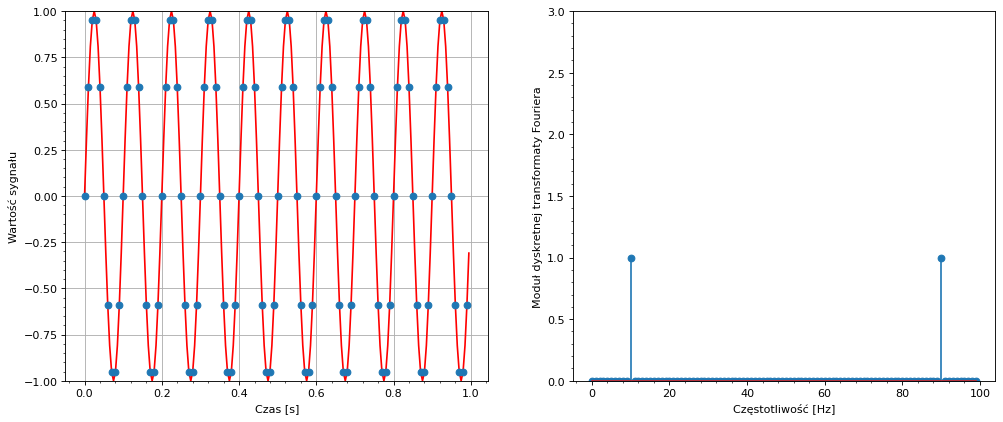

In [77]:
# f=10, w=100, A=1, LP=10
draw_signal(amplitude=1, interval_num=10, sampling_freq=100, signal_freq=10)

ii) $sin(2*pi*t*f)$, $f=20Hz$

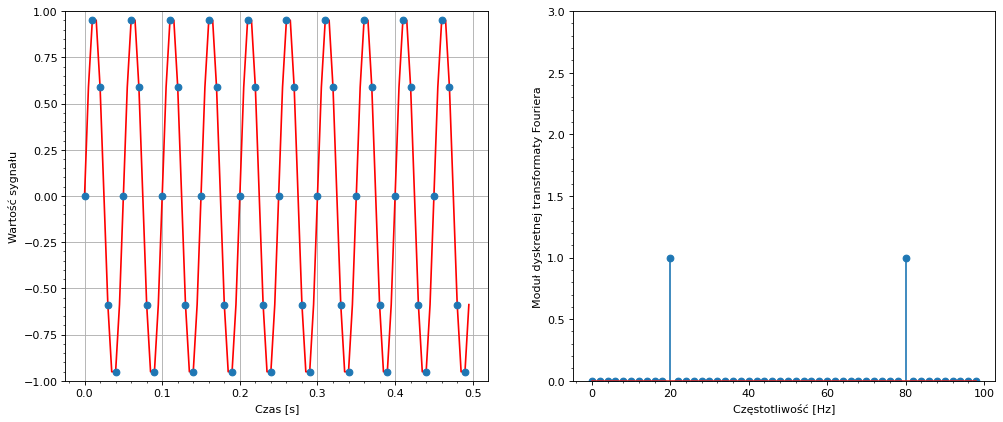

In [78]:
# f=20, w=100, A=1, LP=10
draw_signal(amplitude=1, interval_num=10, sampling_freq=100, signal_freq=20)

iii) $sin(2*pi*t*f)$, $f=30Hz$ (tutaj słupki nie będą wyglądać idealnie, dlaczego?)

<font color="red">
Odpowiedź: Słupki nie wyglądają idealnie, ponieważ korzystamy z dyskretnej transformaty Fouriera co znaczy, że nie wszystkie częstotliwości są zawarte na osi OX wykresu spektrum. Ponieważ częstotliwość 30 [Hz] nie znalazła się na osi OX, funkcja wygenerowała zbiór częstotliwości, których suma zbliżona byłaby częstotliwości 30 [Hz].  
</font>

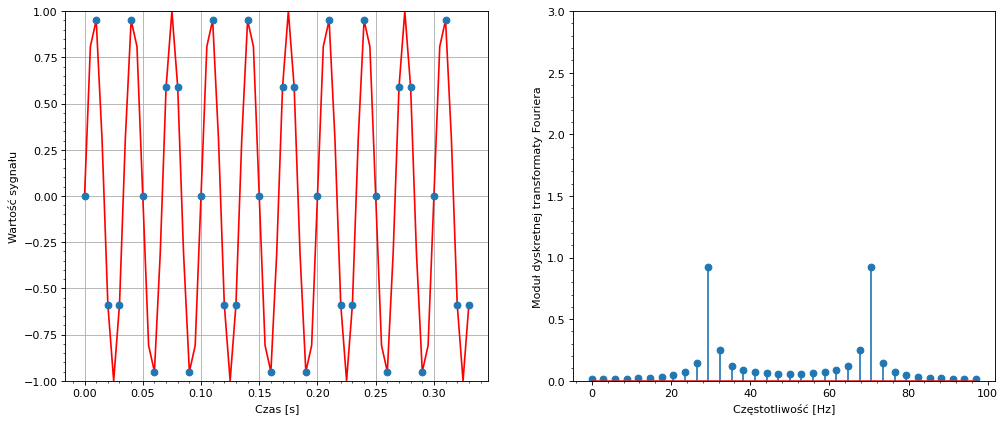

In [81]:
# f=30, w=100, A=1, LP=10
draw_signal(amplitude=1, interval_num=10, sampling_freq=100, signal_freq=30)

iv) $sin(2*pi*t*f)$, $f=40Hz$

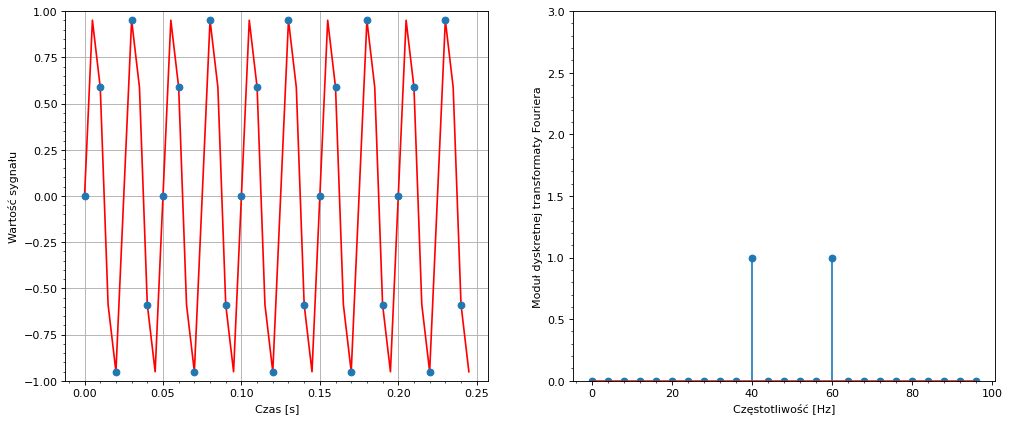

In [82]:
# f=40, w=100, A=1, LP=10
draw_signal(amplitude=1, interval_num=10, sampling_freq=100, signal_freq=40)

c) Przy F=50Hz, w=100Hz, wygeneruj spektrum dla $sin(2*pi*f*t)$. Zwróc uwagę na skalę wykresów.

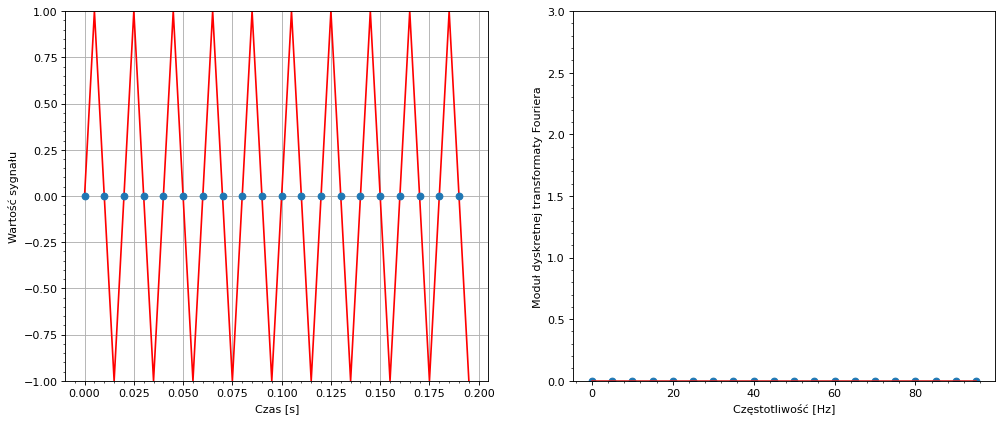

In [85]:
# f=50, w=100, A=1, LP=10
draw_signal(amplitude=1, interval_num=10, sampling_freq=100, signal_freq=50)

c) Jak się nazywa twierdzenie, którego konsekwencją jest takie zachowanie się spektrum?

<font color="red">
Odpowiedź: twierdzenie o próbkowaniu - Jeśli sygnał ciągły nie ma składowych widma o częstotliwości równej lub większej niż B, może on zostać jednoznacznie odtworzony z ciągu jego próbek tworzących sygnał dyskretny, o ile próbki te zostały pobrane z częstotliwością co najmniej 2B.
</font>

# Zadanie 3

Poniższe przypadki składają się z złożonych sygnałów. Trzeba teraz będzie zmodyfikować trochę FUNC

a) $sin(2*pi*t*f) + 2*sin(4*pi*t*f)$, T=1s, w=20Hz.

In [ ]:
# narysuj sygnał

c) Wygenerujemy trochę szumu. Wychodząc z funkcji $sin(2*pi*t*f)$, dodamy do niej 100 losowych sinusów. Wygenerujemy dla nich losowo amplitudy (z [0.02, 0.08], częstotliwości: [5.0, 10.0] oraz modyfikacje fazy[0 + 2*pi]. Inne parametry: w=20Hz, T=1s. Czy dla powyższych parametrów losowania, jesteś w stanie odnaleźć bazowy przebieg $(sin(2*pi*t))$? Czy jesteś w stanie zlokalizować szum?

d) $0.5 + 2*sin(2*pi*t*f)$, T=1s, w=20Hz. Czy amplituda zerowego prążka jest prawidłowa? Dlaczego? (Podpowiedź: zwróć jeszcze raz uwagę na symetrię spektrum).

In [ ]:
# narysuj sygnał


e) $sin(2*pi*t*f)$ oraz $sin(2*pi*t*f + pi/4)$ dla T=1s, w=20Hz. Czy informacja o fazie zniknęła? Poszukaj śladów tej informacji w tablicy, będącej wynikiem operacji fft(signal). (funkcja angle(sygnal, deg=True)

In [68]:
# faza = 0


In [69]:
# faza = pi/4


# Zadanie 4

Oblicz wynik ifft(fft(x)), gdzie x=random.random(10). Czy jakaś informacja została stracona?

In [70]:
# wygeneruj wektor x


In [71]:
# oblicz fft z x


In [72]:
# oblicz ifft

In [ ]:
# porownaj x z ifft(fft(x)), wystarczy print